In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
%matplotlib inline
import torch.nn as nn
import torch.nn.functional as F
from PIL import Image,ImageChops
import glob


In [2]:
data_dir = '../../../Images/BottleStoodUp_atNight/Positive'      #This is for the home laptop
# data_dir = '../../../../BottleStoodUp_atNight/Positive/'        #For the work laptop

In [3]:
transform_characteristics = transforms.Compose([transforms.ToTensor(),
                                                transforms.Resize(255),
                                                transforms.CenterCrop(224)])
dataset = datasets.ImageFolder(data_dir, transform=transform_characteristics)   # By default the imageFolder loads images with 3 channels 
dataloader = torch.utils.data.DataLoader(dataset, batch_size=32, shuffle=True)

In [4]:
X = dataset[0]
image_in_tensor = X[0]
print(image_in_tensor.shape)
print(type(image_in_tensor))

torch.Size([3, 224, 224])
<class 'torch.Tensor'>


c:\Users\alexj\.conda\envs\tfm_2\lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [5]:
single_img_permuted = image_in_tensor.permute(1, 2, 0) 
print(single_img_permuted.shape)
single_img_numpy = single_img_permuted.detach().numpy()
print(single_img_numpy.shape)
print("This is the original image")
plt.imshow(single_img_numpy)


torch.Size([224, 224, 3])
(224, 224, 3)
This is the original image


: 

: 

Let's take the image shape to be (3, 224, 224) instead of (224, 224, 3). This, for the normalization of the image process.

In [7]:
img_transposed = np.transpose(single_img_numpy, (2, 0, 1))
print(img_transposed.shape)

(3, 224, 224)


Computing the normalization of this 3-channel image

In [8]:
img_n = ((img_transposed.T - img_transposed.mean((1,2))) / img_transposed.std((1,2))).T

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


This is the normalized image


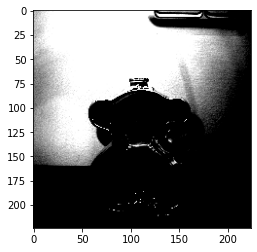

In [9]:
print("This is the normalized image")
img_for_display = np.transpose(img_n, (1,2,0))
plt.imshow(img_for_display)

In [10]:
print("These are the mean values of each channel of the normalized image: ", img_n.mean((1,2)))

These are the mean values of each channel of the normalized image:  [-3.4546366e-07 -3.4546366e-07 -3.4546366e-07]


In [11]:
print("These are the std values of each channel of the normalized image: ", img_n.std((1,2)))

These are the std values of each channel of the normalized image:  [0.99999994 0.99999994 0.99999994]


As expected, the mean value is around 0 and the standard deviation is close to 1.